In [1]:
pip freeze > requirements.txt

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import os
import pickle

print(np.__version__)
print(cv2.__version__)
print(cv2.__version__)

1.19.5
4.1.2
4.1.2


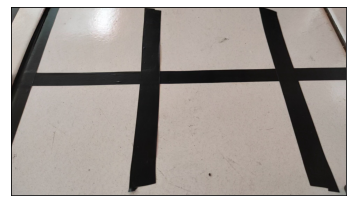

In [ ]:
images = plt.imread('img/parking_1.jpg')

plt.imshow(images)
plt.xticks([])
plt.yticks([])
plt.show()

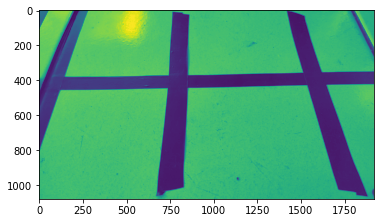

In [ ]:
def to_gray(img):
  return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

img_gray = to_gray(images)
plt.imshow(img_gray)
plt.show()

In [ ]:
img_gray.shape

(1080, 1920)

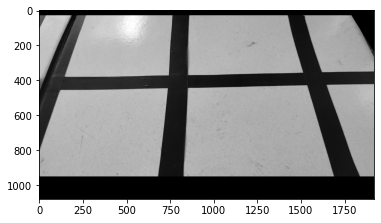

In [ ]:
#w, h
def select_roi(img_gray):
  ROI = np.array([[(0, 950), (0, 30), (1790,30), (1920, 240), (1920, 950)]], dtype=np.int32)
  #ROI = np.array([[(0, 90),(1280, 0), (1280, 720)]], dtype=np.int32)
  blank = np.zeros_like(img_gray)
  masking = cv2.fillPoly(blank, ROI, 255)
  masked = cv2.bitwise_and(img_gray, masking)
  return masked

masked_img = select_roi(img_gray)

plt.imshow(masked_img, cmap = 'gray')

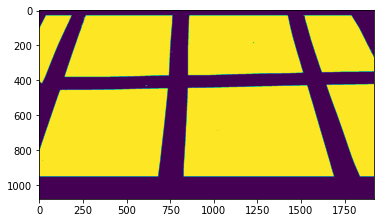

In [ ]:
def to_treshold(img):
  _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  return thresh

img_tresh = to_treshold(masked_img)
plt.imshow(img_tresh)
plt.show()

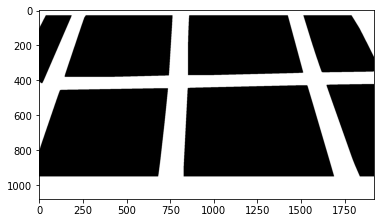

[(1515, 30, 405, 326), (854, 30, 660, 342), (147, 30, 618, 352), (0, 30, 187, 388), (1648, 423, 272, 528), (829, 430, 862, 521), (0, 447, 739, 504)]


In [ ]:
#def detect_countour(img, treshold):
contours, hierarchy = cv2.findContours(img_tresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
mask = np.ones_like(images) * 255

box = []
for c in contours:
  if cv2.contourArea(c) > 100:
    hull = cv2.convexHull(c)
    cv2.drawContours(mask, [hull], -1, 0, -1)
    x,y,z,a = cv2.boundingRect(c)
    box.append((x,y,z,a))

box = sorted(box, key=lambda box: box[1])
plt.imshow(mask)
plt.show()
print(box)
#detect = detect_countour(images, img_tresh)

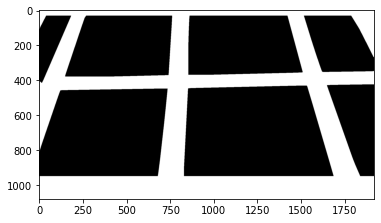

In [ ]:
mask = cv2.dilate(mask, np.ones((5, 5), np.uint8))

plt.imshow(mask)

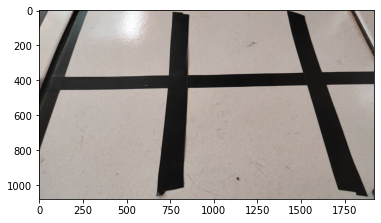

In [ ]:
image = cv2.imread('img/parking_1.jpg')
image[mask != 0] = 255
plt.imshow(images)
plt.show()

(1515, 30, 405, 326)
(854, 30, 660, 342)
(147, 30, 618, 352)
(0, 30, 187, 388)
(1648, 423, 272, 528)
(829, 430, 862, 521)
(0, 447, 739, 504)
(0, 447, 739, 504)


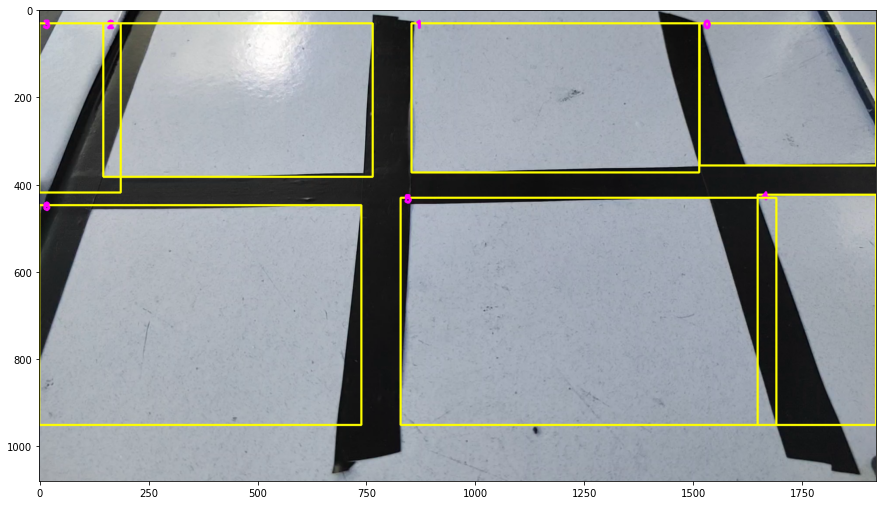

In [ ]:
result = cv2.imread('img/parking_1.jpg')

for i, boxs in enumerate(box):
  a,b,c,d = boxs 
  print(boxs)
  folder ='segmented'
  cropted = result[b:b+d, a:a+c]
  img_name = 'img_'+str(i+42)+'.jpg'
  cv2.imwrite(os.path.join(folder, img_name), cropted)
  cv2.rectangle(result, (a,b), (a+c, b+d), (255, 255, 0), 3)
  cv2.putText(result, str(i), (a+10, b+10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,255), 5, cv2.LINE_8)
plt.figure(figsize=(15,12))
plt.imshow(result)
print(boxs)

In [ ]:
# save file to zip

from zipfile import ZipFile

with ZipFile('segmentedvid.zip', 'w') as zip:
  for folder, subfolder, name in os.walk('segmented'):
    for path in name:
      paths = os.path.join(folder, path)
      zip.write(paths, os.path.basename(paths))


In [ ]:
import pickle

with open('spot.pickle', 'wb') as data:
  pickle.dump(box, data, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
def to_canny(img):
  return cv2.Canny(img, 100, 200)
img_canny = to_canny(img_tresh)
plt.imshow(img_canny)
plt.show()

In [ ]:
def select_roi(img):
  

In [ ]:
def to_hough_line(img):
  return cv2.HoughLinesP(img, 1, np.pi/180, 50, minLineLength=50, maxLineGap=100)

img_hough = to_hough_line(img_canny)

In [ ]:
np.array(img_hough)

In [ ]:
img = plt.imread('img/parking_1.jpg')
def drawing_line(image, line):
    for lines in line:
        for x,y,x1,y1 in lines:
            cv2.line(image, (x,y), (x1,y1), (255,2555,0), 5)
    
    return image

imgs = drawing_line(img, img_hough)
plt.imshow(imgs)
plt.show()